# Bathymetry for Barkley Canyon

Uses General Bathymetric Chart of the Ocean (GEBCO) NetCDF data to create an approximate bathymetry plot for Barkley Canyon. This plot is NOT scaled to WGS84 coordinate system, but is approximately accurate.

## Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import cmocean
from matplotlib.ticker import FormatStrFormatter
%matplotlib notebook

In [3]:
ds = xr.open_dataset('../../../Data/Bathymetry/british_columbia_3_msl_2013.nc')     # import regional data
print(ds)

<xarray.Dataset>
Dimensions:  (lat: 7381, lon: 18301)
Coordinates:
  * lat      (lat) float64 48.05 48.05 48.05 48.05 48.05 ... 54.2 54.2 54.2 54.2
  * lon      (lon) float64 -137.4 -137.4 -137.4 -137.4 ... -122.2 -122.2 -122.2
Data variables:
    crs      |S1 ...
    Band1    (lat, lon) float32 ...
Attributes:
    GDAL_AREA_OR_POINT:              Area
    Conventions:                     ACDD 1.3, CF-1.6
    GDAL:                            GDAL 1.11.4, released 2016/01/25
    history:                         Tue Jul 26 17:34:35 2016: GDAL CreateCop...
    title:                           British Columbia 3 arc-second Bathymetri...
    GMT_version:                     4.5.13 [64-bit]
    node_offset:                     1
    summary:                         The 3 arc-second British Columbia DEM wi...
    keywords:                        Earth Science > Oceans > Bathymetry/Seaf...
    time_coverage_start:             1930-01-01
    time_coverage_end:               2012-01-01
    id:  

## Define region

In [35]:
lon = np.array(ds.lon.values[13520:13900])           # set desired region using lat and lon
lat = np.array(ds.lat.values[210:460])
elev = np.array(ds.Band1.values[210:460,13520:13900])

slope_lat = 48.427                                  # set specific coordinates for ADCP
slope_lon = -126.174
axis_lat = 48.317
axis_lon = -126.050
line_y = np.array([slope_lat-0.003,axis_lat+0.000]) # set coordinates for distance line
line_x = np.array([slope_lon+0.003,axis_lon-0.002])

<IPython.core.display.Javascript object>


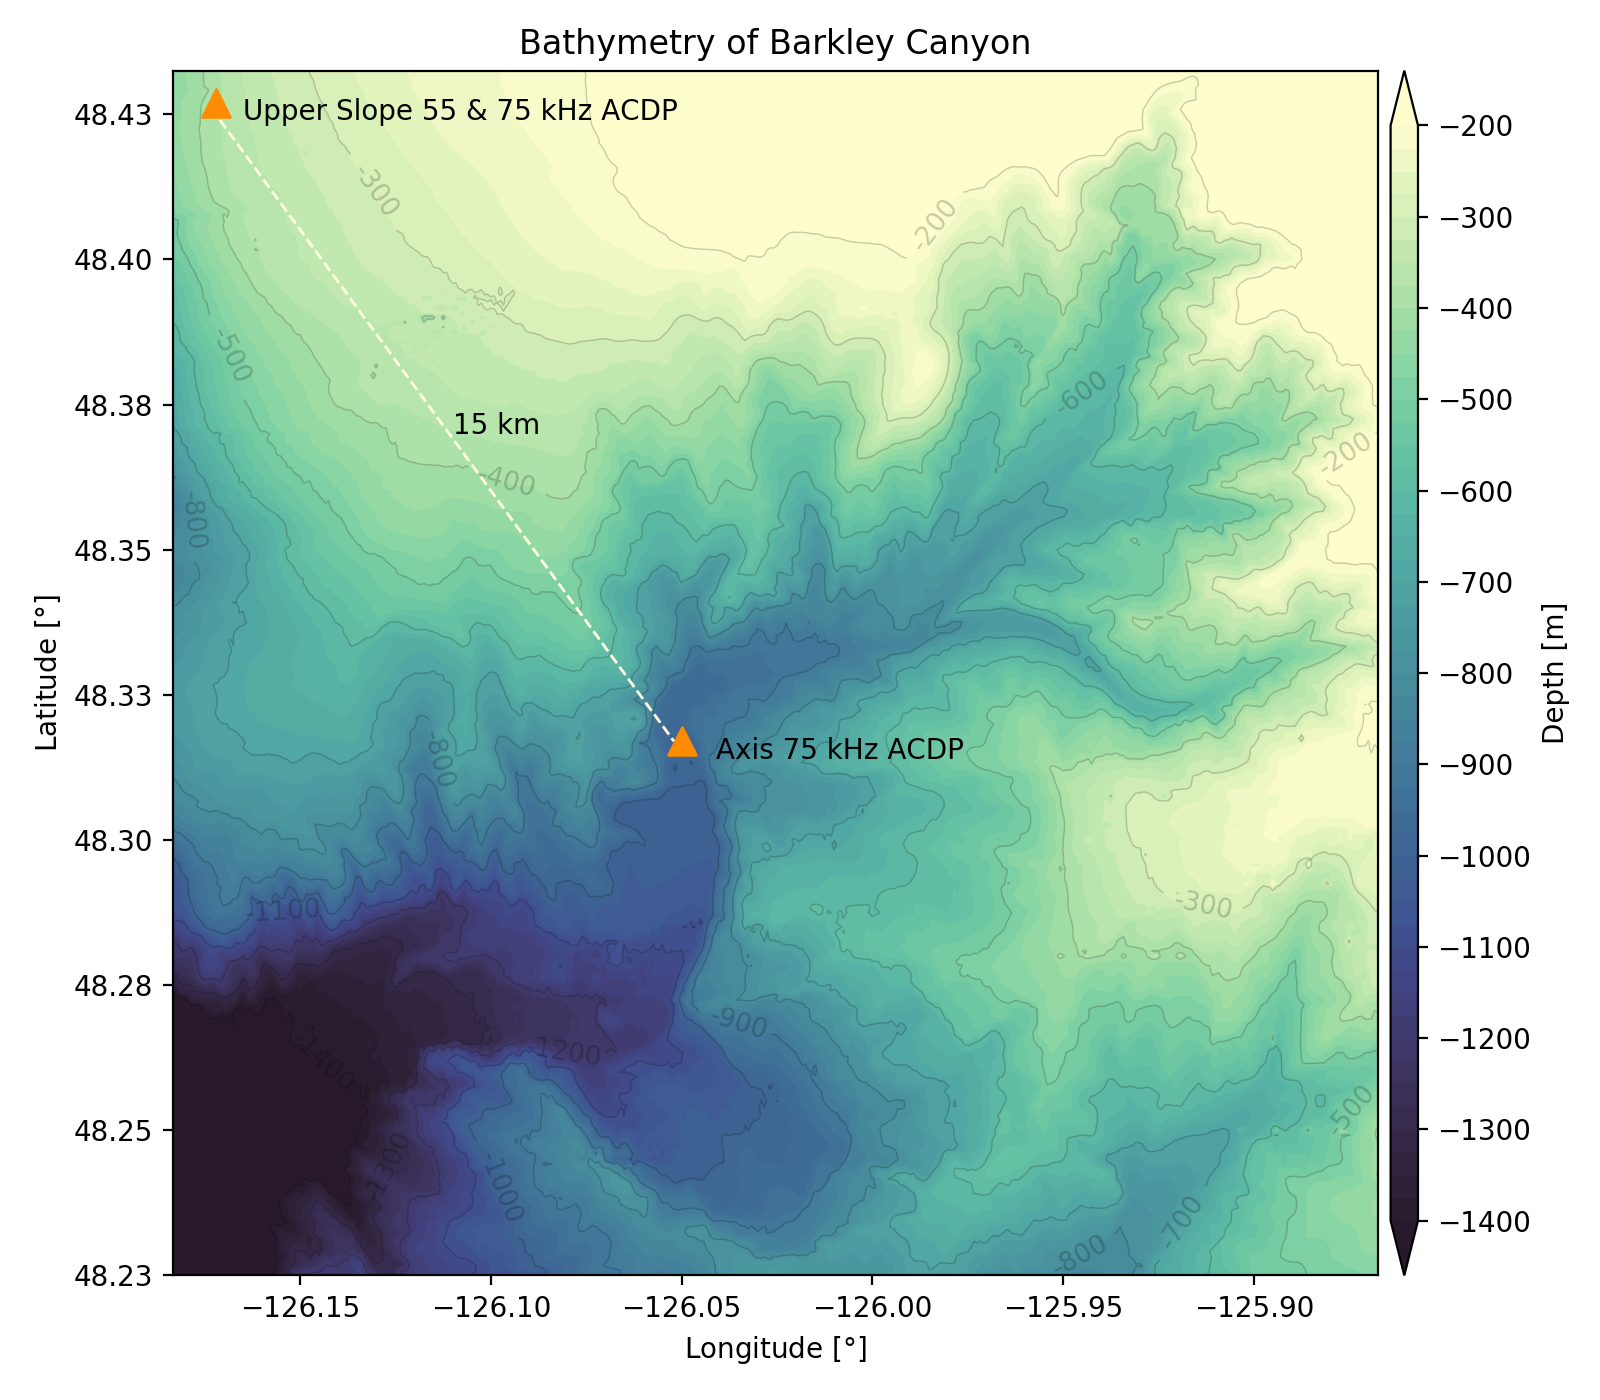

In [36]:
# plot bathymetry

fig, ax = plt.subplots(1,1,figsize=(8,7))

levels = 25       # set contour parameters for visual clarity and adjust colorbar
vmin = -1400
vmax = -200
ticks = np.arange(vmin,vmax+1,100)
level_boundaries = np.arange(vmin,vmax+1,levels)

im = ax.contourf(lon,lat,elev,levels=level_boundaries,vmin=vmin,vmax=vmax,extend='both',cmap='cmo.deep_r')
cbar = fig.colorbar(im,fraction=0.05,aspect=40,pad=0.01,ticks=ticks,label='Depth [m]')
im1 = ax.contour(lon,lat,elev,levels=ticks,colors='black',linewidths=0.5,linestyles='solid',alpha=0.2)
ax.set_xlabel('Longitude [$\degree$]')
ax.set_ylabel('Latitude [$\degree$]')
ax.set_title('Bathymetry of Barkley Canyon')

ax.plot(line_x,line_y,color='lightyellow',ls='--',lw=1)
ax.scatter(slope_lon+0.002,slope_lat,color='darkorange',s=100,marker='^')
ax.text(-126.165,48.424,'Upper Slope 55 & 75 kHz ACDP',fontsize=10)
ax.scatter(axis_lon,axis_lat,color='darkorange',s=100,marker='^')
ax.text(-126.041,48.314,'Axis 75 kHz ACDP',fontsize=10)
ax.text(-126.110,48.370,'15 km',fontsize=10)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

ax.clabel(im1, ticks, inline=True, fontsize=9.5, fmt = '%.f')

fig.tight_layout()
plt.show()

plt.savefig(fname='./bathymetry.pdf',format='pdf')